In [16]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost

In [17]:
from catboost import CatBoostClassifier, Pool

In [18]:
df = pd.read_csv('mtp_dataset_3_mod.csv')
boring = df[df['life_mode'] == 'boring'].index
df['body_size'] = np.log(df['body_size']) #log transforming body size
df = df.assign(survival_status=df.survival_status.eq('Extinct').astype(int)) #encoding "extinct" as 1 and "survived" as 0
df.drop(['order'], axis = 1, inplace = True) #dropping the column "order"
df.replace('boring', 'infaunal', inplace = True)
df


,lithology,life_mode,motility,feeding_mode,shell_mineralogy,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status
0,mixed,epifaunal,stationary,suspension feeder,aragonite,1,2,2,1,2,3.056486,0
1,siliciclastic,epifaunal,mobile,suspension feeder,aragonite,1,2,4,4,10,4.948570,0
2,siliciclastic,infaunal,mobile,deposit feeder,aragonite,1,2,1,1,1,3.540013,0
3,siliciclastic,infaunal,mobile,deposit feeder,aragonite,4,2,5,4,33,1.085132,0
4,mixed,epifaunal,stationary,suspension feeder,low Mg calcite,3,2,2,6,62,4.377049,0
...,...,...,...,...,...,...,...,...,...,...,...,...
303,siliciclastic,epifaunal,stationary,suspension feeder,aragonite,1,2,1,1,5,3.092152,1
304,siliciclastic,infaunal,stationary,suspension feeder,aragonite,1,2,1,1,1,2.973484,0
305,siliciclastic,infaunal,mobile,suspension feeder,aragonite,3,2,3,2,6,4.261218,1
306,siliciclastic,infaunal,mobile,deposit feeder,aragonite,5,1,4,2,15,3.431797,0


In [19]:
from sklearn.preprocessing import MinMaxScaler #normalises the data

num_cols = ['species_richness', 'ornamentation', 'environmental_breadth', 'geographic_range', 'occurrence', 'body_size']
cat_cols = ['lithology', 'life_mode', 'motility', 'feeding_mode', 'shell_mineralogy']

# apply one-hot encoding on categorical features
df = pd.get_dummies(df, columns = cat_cols)

# apply normalisation on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = MinMaxScaler().fit(df[[i]])
    
    # transform the training data column
    df[i] = scale.transform(df[[i]])

In [20]:
df

,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status,lithology_carbonate,lithology_mixed,lithology_others,...,motility_mobile,motility_stationary,feeding_mode_carnivore,feeding_mode_chemosymbiotic,feeding_mode_deposit feeder,feeding_mode_herbivore,feeding_mode_photosymbiotic,feeding_mode_suspension feeder,shell_mineralogy_aragonite,shell_mineralogy_low Mg calcite
0,0.0,0.5,0.166667,0.000000,0.002062,0.466741,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0.0,0.5,0.500000,0.214286,0.018557,0.874605,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0.0,0.5,0.000000,0.000000,0.000000,0.570972,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.3,0.5,0.666667,0.214286,0.065979,0.041790,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.2,0.5,0.166667,0.357143,0.125773,0.751406,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.5,0.000000,0.000000,0.008247,0.474430,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
304,0.0,0.5,0.000000,0.000000,0.000000,0.448849,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
305,0.2,0.5,0.333333,0.071429,0.010309,0.726437,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
306,0.4,0.0,0.500000,0.071429,0.028866,0.547645,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [21]:
# features = df.drop("survival_status", axis=1)
# target = df.survival_status

# cols = features.columns.to_list()
# print(cols)

# col_idx = [features.columns.tolist().index(col) for col in cols]

In [22]:
# def training(train, test, fold_no):
#   x_train = train.drop(['survival_status'],axis=1)
#   y_train = train.survival_status
#   x_test = test.drop(['survival_status'],axis=1)
#   y_test = test.survival_status
#   model.fit(x_train, y_train)
#   score = model.score(x_test,y_test)
#   print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

# fold_no = 1
# for train_index,test_index in cv.split(x, y):
#   train = df.iloc[train_index,:]
#   test = df.iloc[test_index,:]
#   training(train, test, fold_no)
#   fold_no += 1

In [23]:
# def training(train, test, fold_no):
#   x_train = train.drop(['survival_status'],axis=1)
#   y_train = train.survival_status
#   x_train, y_train = smote.fit_resample(x_train, y_train)
#   x_test = test.drop(['survival_status'],axis=1)
#   y_test = test.survival_status
#   model.fit(x_train, y_train)
#   score = model.score(x_test,y_test)
#   print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

# fold_no = 1
# for train_index,test_index in cv.split(x, y):
#   train = df.iloc[train_index,:]
#   test = df.iloc[test_index,:]
#   training(train, test, fold_no)
#   fold_no += 1

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species_richness                 308 non-null    float64
 1   ornamentation                    308 non-null    float64
 2   environmental_breadth            308 non-null    float64
 3   geographic_range                 308 non-null    float64
 4   occurrence                       308 non-null    float64
 5   body_size                        308 non-null    float64
 6   survival_status                  308 non-null    int64  
 7   lithology_carbonate              308 non-null    uint8  
 8   lithology_mixed                  308 non-null    uint8  
 9   lithology_others                 308 non-null    uint8  
 10  lithology_siliciclastic          308 non-null    uint8  
 11  life_mode_epifaunal              308 non-null    uint8  
 12  life_mode_infaunal    

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X = df.loc[:, df.columns != 'survival_status']
y = df.loc[:,'survival_status']

X, y = smote.fit_resample(X, y)

In [26]:
from sklearn import svm
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
import matplotlib.patches as patches
from scipy import interp

cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)
clf = CatBoostClassifier()

Learning rate set to 0.006668
0:	learn: 0.6911420	total: 1.92ms	remaining: 1.92s
1:	learn: 0.6894281	total: 2.8ms	remaining: 1.4s
2:	learn: 0.6879903	total: 3.56ms	remaining: 1.18s
3:	learn: 0.6871602	total: 3.96ms	remaining: 988ms
4:	learn: 0.6858661	total: 4.89ms	remaining: 974ms
5:	learn: 0.6838935	total: 5.6ms	remaining: 928ms
6:	learn: 0.6819457	total: 6.29ms	remaining: 892ms
7:	learn: 0.6799002	total: 7.06ms	remaining: 876ms
8:	learn: 0.6781641	total: 7.8ms	remaining: 859ms
9:	learn: 0.6762768	total: 8.53ms	remaining: 845ms
10:	learn: 0.6744909	total: 9.38ms	remaining: 844ms
11:	learn: 0.6723124	total: 10.3ms	remaining: 845ms
12:	learn: 0.6708869	total: 11ms	remaining: 838ms
13:	learn: 0.6685493	total: 12ms	remaining: 842ms
14:	learn: 0.6672512	total: 12.7ms	remaining: 833ms
15:	learn: 0.6654656	total: 13.5ms	remaining: 827ms
16:	learn: 0.6635996	total: 14.1ms	remaining: 818ms
17:	learn: 0.6618053	total: 14.9ms	remaining: 812ms
18:	learn: 0.6601213	total: 15.6ms	remaining: 806ms


scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


211:	learn: 0.4684378	total: 165ms	remaining: 613ms
212:	learn: 0.4677766	total: 166ms	remaining: 613ms
213:	learn: 0.4671184	total: 167ms	remaining: 612ms
214:	learn: 0.4664753	total: 167ms	remaining: 611ms
215:	learn: 0.4657358	total: 168ms	remaining: 610ms
216:	learn: 0.4652486	total: 169ms	remaining: 609ms
217:	learn: 0.4645658	total: 170ms	remaining: 609ms
218:	learn: 0.4639280	total: 171ms	remaining: 608ms
219:	learn: 0.4632186	total: 171ms	remaining: 608ms
220:	learn: 0.4626647	total: 172ms	remaining: 607ms
221:	learn: 0.4622882	total: 173ms	remaining: 605ms
222:	learn: 0.4617753	total: 173ms	remaining: 604ms
223:	learn: 0.4611029	total: 174ms	remaining: 603ms
224:	learn: 0.4605133	total: 175ms	remaining: 602ms
225:	learn: 0.4596138	total: 176ms	remaining: 602ms
226:	learn: 0.4590940	total: 176ms	remaining: 601ms
227:	learn: 0.4585726	total: 177ms	remaining: 600ms
228:	learn: 0.4579761	total: 178ms	remaining: 600ms
229:	learn: 0.4574206	total: 179ms	remaining: 599ms
230:	learn: 

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


179:	learn: 0.4849771	total: 139ms	remaining: 635ms
180:	learn: 0.4841750	total: 140ms	remaining: 635ms
181:	learn: 0.4835605	total: 141ms	remaining: 635ms
182:	learn: 0.4830439	total: 142ms	remaining: 634ms
183:	learn: 0.4823803	total: 143ms	remaining: 636ms
184:	learn: 0.4815965	total: 144ms	remaining: 635ms
185:	learn: 0.4807804	total: 145ms	remaining: 634ms
186:	learn: 0.4801604	total: 146ms	remaining: 634ms
187:	learn: 0.4798691	total: 147ms	remaining: 633ms
188:	learn: 0.4794274	total: 147ms	remaining: 632ms
189:	learn: 0.4786295	total: 148ms	remaining: 632ms
190:	learn: 0.4780124	total: 149ms	remaining: 631ms
191:	learn: 0.4768841	total: 150ms	remaining: 631ms
192:	learn: 0.4762317	total: 151ms	remaining: 630ms
193:	learn: 0.4757862	total: 151ms	remaining: 629ms
194:	learn: 0.4751416	total: 152ms	remaining: 629ms
195:	learn: 0.4741138	total: 153ms	remaining: 628ms
196:	learn: 0.4738737	total: 154ms	remaining: 628ms
197:	learn: 0.4732652	total: 155ms	remaining: 627ms
198:	learn: 

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


121:	learn: 0.5422622	total: 95.2ms	remaining: 685ms
122:	learn: 0.5416997	total: 96.2ms	remaining: 686ms
123:	learn: 0.5406172	total: 97.2ms	remaining: 687ms
124:	learn: 0.5396704	total: 98ms	remaining: 686ms
125:	learn: 0.5388894	total: 99.6ms	remaining: 691ms
126:	learn: 0.5382200	total: 100ms	remaining: 690ms
127:	learn: 0.5376101	total: 101ms	remaining: 689ms
128:	learn: 0.5367855	total: 102ms	remaining: 689ms
129:	learn: 0.5360758	total: 103ms	remaining: 688ms
130:	learn: 0.5349680	total: 104ms	remaining: 687ms
131:	learn: 0.5343046	total: 104ms	remaining: 687ms
132:	learn: 0.5333506	total: 105ms	remaining: 686ms
133:	learn: 0.5326914	total: 106ms	remaining: 685ms
134:	learn: 0.5316417	total: 107ms	remaining: 685ms
135:	learn: 0.5311781	total: 108ms	remaining: 684ms
136:	learn: 0.5306364	total: 108ms	remaining: 683ms
137:	learn: 0.5297985	total: 109ms	remaining: 683ms
138:	learn: 0.5289472	total: 110ms	remaining: 682ms
139:	learn: 0.5282364	total: 111ms	remaining: 682ms
140:	lear

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


51:	learn: 0.6199846	total: 66.8ms	remaining: 1.22s
52:	learn: 0.6183401	total: 68.8ms	remaining: 1.23s
53:	learn: 0.6170639	total: 70.1ms	remaining: 1.23s
54:	learn: 0.6158375	total: 71.4ms	remaining: 1.23s
55:	learn: 0.6147987	total: 72.6ms	remaining: 1.22s
56:	learn: 0.6131736	total: 74ms	remaining: 1.22s
57:	learn: 0.6121484	total: 75.2ms	remaining: 1.22s
58:	learn: 0.6111757	total: 76.5ms	remaining: 1.22s
59:	learn: 0.6102173	total: 77.8ms	remaining: 1.22s
60:	learn: 0.6087177	total: 79.2ms	remaining: 1.22s
61:	learn: 0.6074707	total: 80.4ms	remaining: 1.22s
62:	learn: 0.6063525	total: 81.7ms	remaining: 1.21s
63:	learn: 0.6048834	total: 83ms	remaining: 1.21s
64:	learn: 0.6035511	total: 84.2ms	remaining: 1.21s
65:	learn: 0.6027250	total: 85.4ms	remaining: 1.21s
66:	learn: 0.6016292	total: 86.7ms	remaining: 1.21s
67:	learn: 0.6005417	total: 88ms	remaining: 1.21s
68:	learn: 0.5995823	total: 89.4ms	remaining: 1.21s
69:	learn: 0.5986750	total: 90.6ms	remaining: 1.2s
70:	learn: 0.597466

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


223:	learn: 0.4646809	total: 173ms	remaining: 600ms
224:	learn: 0.4638999	total: 174ms	remaining: 600ms
225:	learn: 0.4633249	total: 175ms	remaining: 599ms
226:	learn: 0.4626238	total: 176ms	remaining: 599ms
227:	learn: 0.4621332	total: 177ms	remaining: 598ms
228:	learn: 0.4614752	total: 177ms	remaining: 597ms
229:	learn: 0.4605911	total: 178ms	remaining: 596ms
230:	learn: 0.4600622	total: 179ms	remaining: 595ms
231:	learn: 0.4594477	total: 180ms	remaining: 595ms
232:	learn: 0.4589500	total: 180ms	remaining: 594ms
233:	learn: 0.4583349	total: 181ms	remaining: 593ms
234:	learn: 0.4576134	total: 182ms	remaining: 592ms
235:	learn: 0.4570092	total: 183ms	remaining: 592ms
236:	learn: 0.4561651	total: 183ms	remaining: 591ms
237:	learn: 0.4556010	total: 184ms	remaining: 590ms
238:	learn: 0.4551095	total: 185ms	remaining: 589ms
239:	learn: 0.4546202	total: 186ms	remaining: 588ms
240:	learn: 0.4541861	total: 187ms	remaining: 587ms
241:	learn: 0.4534031	total: 187ms	remaining: 587ms
242:	learn: 

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


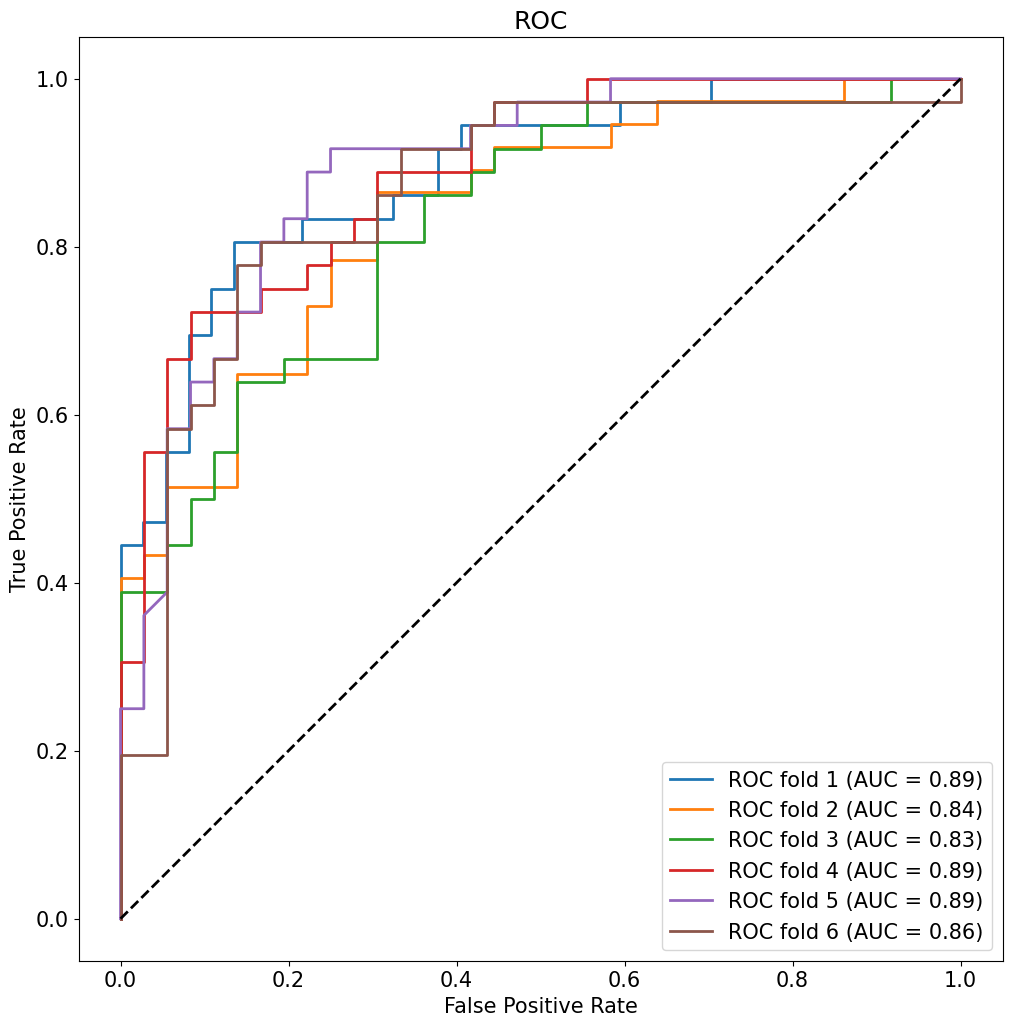

In [32]:
plt.rcParams.update({'font.size': 15})

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
# ax1.add_patch(
#     patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
#     )
# ax1.add_patch(
#     patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
#     )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
#plt.plot(mean_fpr, mean_tpr, color='black', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
# plt.text(0.32,0.7,'More accurate area',fontsize = 12)
# plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## SHAP for different splits

In [28]:
import shap

In [29]:
group_categorical = {
    'lithology' : 	['lithology_carbonate',
                    'lithology_mixed',
                    'lithology_others',
                    'lithology_siliciclastic'],
    
    'life_mode'	:['life_mode_epifaunal',
                'life_mode_infaunal',
                'life_mode_semi-infaunal'],
    
    'motility' : ['motility_mobile',
                'motility_stationary'],
    
    'feeding_mode' : ['feeding_mode_carnivore',
                    'feeding_mode_chemosymbiotic',
                    'feeding_mode_deposit feeder',
                    'feeding_mode_photosymbiotic',
                    'feeding_mode_suspension feeder'],	
    
    'shell_mineralogy' : ['shell_mineralogy_aragonite',
                        'shell_mineralogy_low Mg calcite'],

    'species_richness' : ['species_richness'],
    
    'ornamentation'	: ['ornamentation'],
    
    'environmental_breadth' : ['environmental_breadth'],	
    
    'geographic_range' : ['geographic_range'],	
    
    'occurrence' : ['occurrence'],

    'body_size' : ['body_size']
}

from itertools import repeat, chain
revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))

map = revert_dict(group_categorical)

def grouped_shap(shap_vals, features, groups):
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

Learning rate set to 0.006668
0:	learn: 0.6911420	total: 1.92ms	remaining: 1.91s
1:	learn: 0.6894281	total: 3.06ms	remaining: 1.53s
2:	learn: 0.6879903	total: 4.15ms	remaining: 1.38s
3:	learn: 0.6871602	total: 4.67ms	remaining: 1.16s
4:	learn: 0.6858661	total: 5.73ms	remaining: 1.14s
5:	learn: 0.6838935	total: 6.88ms	remaining: 1.14s
6:	learn: 0.6819457	total: 9.7ms	remaining: 1.38s
7:	learn: 0.6799002	total: 11.7ms	remaining: 1.45s
8:	learn: 0.6781641	total: 13.4ms	remaining: 1.48s
9:	learn: 0.6762768	total: 14.5ms	remaining: 1.43s
10:	learn: 0.6744909	total: 15.8ms	remaining: 1.42s
11:	learn: 0.6723124	total: 16.8ms	remaining: 1.38s
12:	learn: 0.6708869	total: 17.7ms	remaining: 1.34s
13:	learn: 0.6685493	total: 18.7ms	remaining: 1.31s
14:	learn: 0.6672512	total: 19.8ms	remaining: 1.3s
15:	learn: 0.6654656	total: 20.7ms	remaining: 1.27s
16:	learn: 0.6635996	total: 21.6ms	remaining: 1.25s
17:	learn: 0.6618053	total: 22.7ms	remaining: 1.24s
18:	learn: 0.6601213	total: 24.3ms	remaining: 

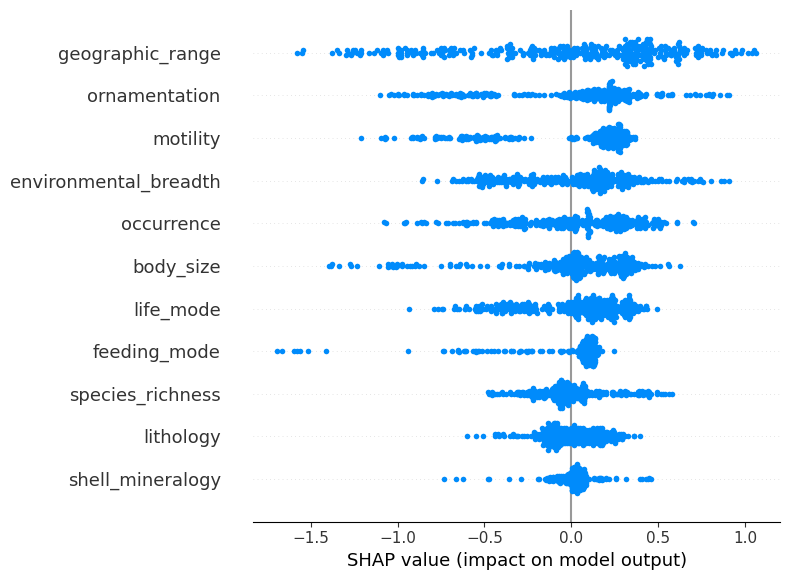

Learning rate set to 0.006668
0:	learn: 0.6916451	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6900509	total: 2.74ms	remaining: 1.37s
2:	learn: 0.6884754	total: 4.41ms	remaining: 1.47s
3:	learn: 0.6865534	total: 5.58ms	remaining: 1.39s
4:	learn: 0.6846186	total: 6.66ms	remaining: 1.32s
5:	learn: 0.6824054	total: 7.68ms	remaining: 1.27s
6:	learn: 0.6805638	total: 8.94ms	remaining: 1.27s
7:	learn: 0.6788489	total: 10ms	remaining: 1.24s
8:	learn: 0.6772011	total: 11ms	remaining: 1.21s
9:	learn: 0.6760111	total: 12.2ms	remaining: 1.21s
10:	learn: 0.6740651	total: 14ms	remaining: 1.26s
11:	learn: 0.6723547	total: 16.1ms	remaining: 1.32s
12:	learn: 0.6710553	total: 17.6ms	remaining: 1.33s
13:	learn: 0.6696820	total: 18.7ms	remaining: 1.32s
14:	learn: 0.6683622	total: 20.3ms	remaining: 1.33s
15:	learn: 0.6666093	total: 21.7ms	remaining: 1.33s
16:	learn: 0.6644081	total: 22.9ms	remaining: 1.32s
17:	learn: 0.6631403	total: 23.9ms	remaining: 1.3s
18:	learn: 0.6615691	total: 25ms	remaining: 1.29s
1

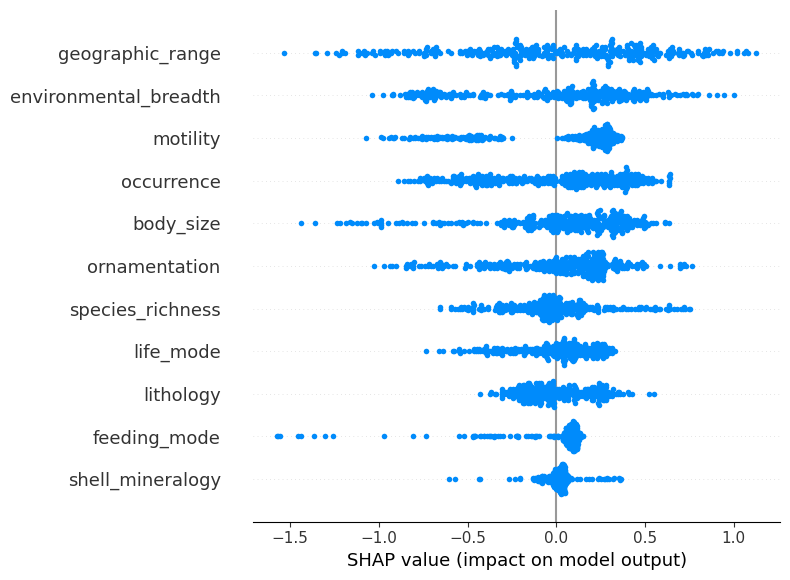

Learning rate set to 0.006676
0:	learn: 0.6909972	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6891616	total: 3.79ms	remaining: 1.89s
2:	learn: 0.6876756	total: 5.87ms	remaining: 1.95s
3:	learn: 0.6852554	total: 6.99ms	remaining: 1.74s
4:	learn: 0.6837340	total: 8.2ms	remaining: 1.63s
5:	learn: 0.6818518	total: 10.4ms	remaining: 1.72s
6:	learn: 0.6798980	total: 11.8ms	remaining: 1.67s
7:	learn: 0.6782283	total: 13.1ms	remaining: 1.62s
8:	learn: 0.6763414	total: 14.4ms	remaining: 1.59s
9:	learn: 0.6744678	total: 16ms	remaining: 1.58s
10:	learn: 0.6729395	total: 20ms	remaining: 1.8s
11:	learn: 0.6717809	total: 21.5ms	remaining: 1.77s
12:	learn: 0.6692011	total: 22.7ms	remaining: 1.72s
13:	learn: 0.6668109	total: 24ms	remaining: 1.69s
14:	learn: 0.6652297	total: 25.2ms	remaining: 1.66s
15:	learn: 0.6630200	total: 26.4ms	remaining: 1.62s
16:	learn: 0.6612475	total: 27.6ms	remaining: 1.6s
17:	learn: 0.6600325	total: 28.8ms	remaining: 1.57s
18:	learn: 0.6589751	total: 29.8ms	remaining: 1.54s
1

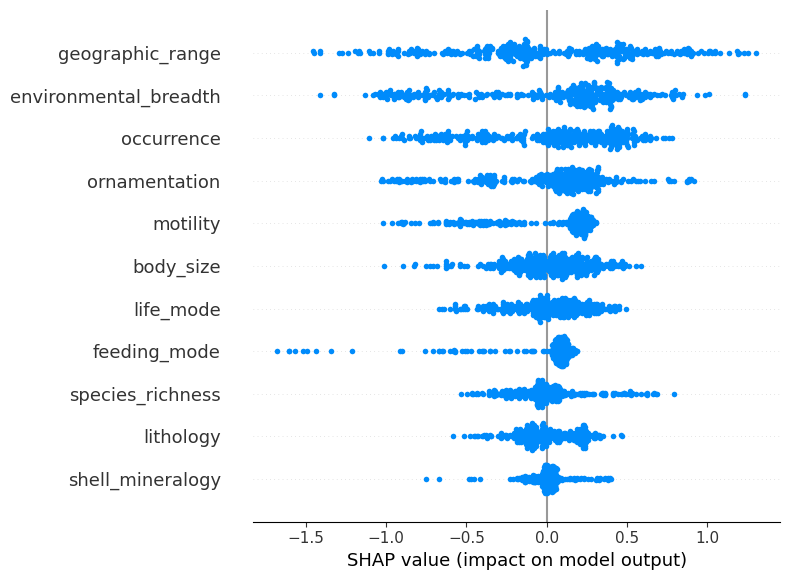

Learning rate set to 0.006676
0:	learn: 0.6911516	total: 1.84ms	remaining: 1.84s
1:	learn: 0.6900895	total: 3.33ms	remaining: 1.66s
2:	learn: 0.6887146	total: 4.7ms	remaining: 1.56s
3:	learn: 0.6868788	total: 5.86ms	remaining: 1.46s
4:	learn: 0.6850877	total: 6.95ms	remaining: 1.38s
5:	learn: 0.6826321	total: 7.92ms	remaining: 1.31s
6:	learn: 0.6808695	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6792009	total: 17.4ms	remaining: 2.16s
8:	learn: 0.6777399	total: 24.1ms	remaining: 2.66s
9:	learn: 0.6753464	total: 25.9ms	remaining: 2.57s
10:	learn: 0.6736248	total: 27.3ms	remaining: 2.45s
11:	learn: 0.6720786	total: 29.6ms	remaining: 2.44s
12:	learn: 0.6706863	total: 31.6ms	remaining: 2.4s
13:	learn: 0.6693855	total: 32.7ms	remaining: 2.3s
14:	learn: 0.6680924	total: 33.7ms	remaining: 2.22s
15:	learn: 0.6667184	total: 34.7ms	remaining: 2.13s
16:	learn: 0.6648464	total: 35.6ms	remaining: 2.06s
17:	learn: 0.6632296	total: 36.5ms	remaining: 1.99s
18:	learn: 0.6618189	total: 37.9ms	remaining: 1

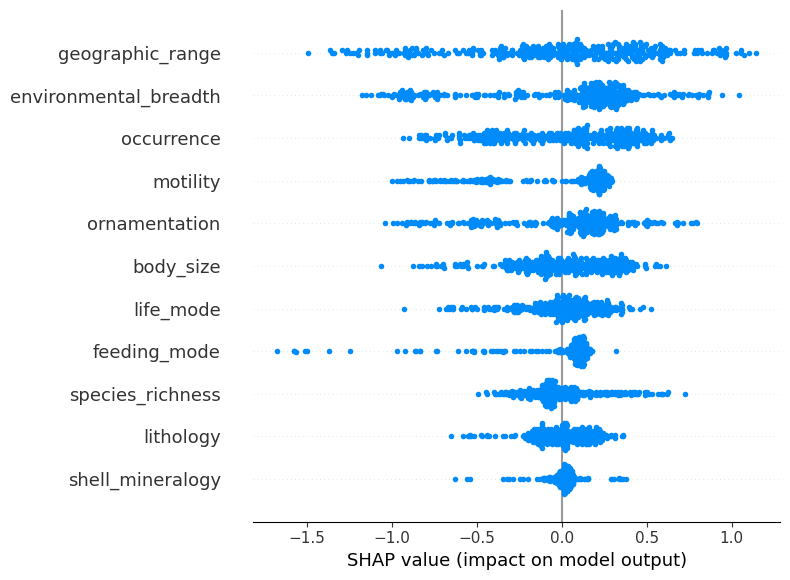

Learning rate set to 0.006676
0:	learn: 0.6915368	total: 2.71ms	remaining: 2.71s
1:	learn: 0.6899992	total: 4.84ms	remaining: 2.41s
2:	learn: 0.6881719	total: 6.88ms	remaining: 2.29s
3:	learn: 0.6864614	total: 8.76ms	remaining: 2.18s
4:	learn: 0.6851355	total: 11ms	remaining: 2.19s
5:	learn: 0.6836361	total: 13.1ms	remaining: 2.17s
6:	learn: 0.6816196	total: 15.7ms	remaining: 2.22s
7:	learn: 0.6796465	total: 18.3ms	remaining: 2.27s
8:	learn: 0.6781383	total: 20.8ms	remaining: 2.29s
9:	learn: 0.6761864	total: 23.4ms	remaining: 2.31s
10:	learn: 0.6743553	total: 28.2ms	remaining: 2.54s
11:	learn: 0.6726752	total: 30.7ms	remaining: 2.53s
12:	learn: 0.6709175	total: 33.2ms	remaining: 2.52s
13:	learn: 0.6695407	total: 35.5ms	remaining: 2.5s
14:	learn: 0.6683799	total: 37.9ms	remaining: 2.49s
15:	learn: 0.6667399	total: 40.4ms	remaining: 2.48s
16:	learn: 0.6653961	total: 43ms	remaining: 2.48s
17:	learn: 0.6644024	total: 45.2ms	remaining: 2.46s
18:	learn: 0.6627832	total: 47ms	remaining: 2.43s

KeyboardInterrupt: 

In [30]:
#fig1 = plt.figure(figsize=[12,12])

i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X.iloc[train])
    features = df.drop(['survival_status'], axis=1).columns.tolist()
    shap_type = grouped_shap(shap_values, features, group_categorical)
    shap.summary_plot(shap_type.values, features=shap_type.columns)
    i= i+1

Learning rate set to 0.006668
0:	learn: 0.6911420	total: 2.87ms	remaining: 2.86s
1:	learn: 0.6894281	total: 3.76ms	remaining: 1.88s
2:	learn: 0.6879903	total: 4.55ms	remaining: 1.51s
3:	learn: 0.6871602	total: 4.86ms	remaining: 1.21s
4:	learn: 0.6858661	total: 5.55ms	remaining: 1.1s
5:	learn: 0.6838935	total: 6.26ms	remaining: 1.04s
6:	learn: 0.6819457	total: 6.96ms	remaining: 988ms
7:	learn: 0.6799002	total: 7.61ms	remaining: 943ms
8:	learn: 0.6781641	total: 8.3ms	remaining: 914ms
9:	learn: 0.6762768	total: 8.95ms	remaining: 886ms
10:	learn: 0.6744909	total: 9.67ms	remaining: 869ms
11:	learn: 0.6723124	total: 10.5ms	remaining: 863ms
12:	learn: 0.6708869	total: 11.2ms	remaining: 849ms
13:	learn: 0.6685493	total: 11.8ms	remaining: 834ms
14:	learn: 0.6672512	total: 12.7ms	remaining: 831ms
15:	learn: 0.6654656	total: 13.8ms	remaining: 848ms
16:	learn: 0.6635996	total: 14.6ms	remaining: 843ms
17:	learn: 0.6618053	total: 15.3ms	remaining: 833ms
18:	learn: 0.6601213	total: 16ms	remaining: 82

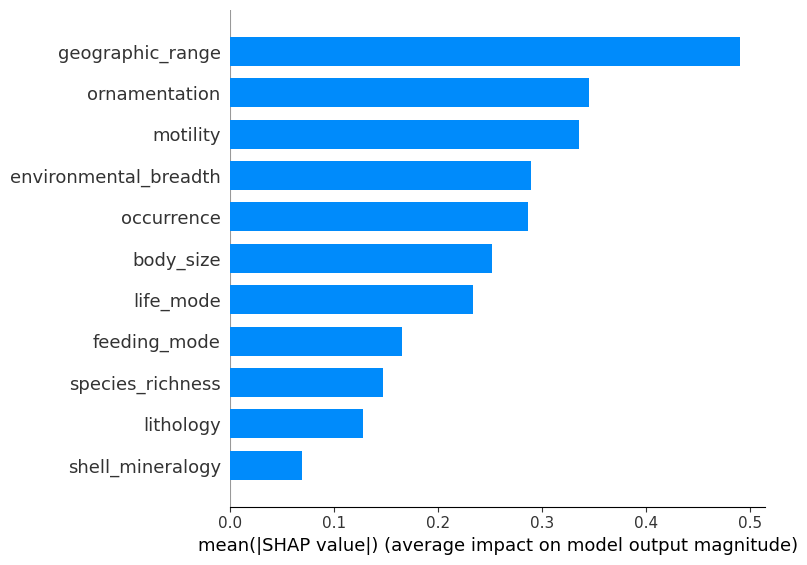

Learning rate set to 0.006668
0:	learn: 0.6916451	total: 2.24ms	remaining: 2.24s
1:	learn: 0.6900509	total: 3.46ms	remaining: 1.73s
2:	learn: 0.6884754	total: 4.69ms	remaining: 1.56s
3:	learn: 0.6865534	total: 5.72ms	remaining: 1.42s
4:	learn: 0.6846186	total: 6.63ms	remaining: 1.32s
5:	learn: 0.6824054	total: 7.52ms	remaining: 1.25s
6:	learn: 0.6805638	total: 8.35ms	remaining: 1.18s
7:	learn: 0.6788489	total: 9.32ms	remaining: 1.16s
8:	learn: 0.6772011	total: 11ms	remaining: 1.22s
9:	learn: 0.6760111	total: 11.9ms	remaining: 1.17s
10:	learn: 0.6740651	total: 12.7ms	remaining: 1.14s
11:	learn: 0.6723547	total: 13.7ms	remaining: 1.13s
12:	learn: 0.6710553	total: 14.8ms	remaining: 1.12s
13:	learn: 0.6696820	total: 16.2ms	remaining: 1.14s
14:	learn: 0.6683622	total: 17.4ms	remaining: 1.14s
15:	learn: 0.6666093	total: 18.7ms	remaining: 1.15s
16:	learn: 0.6644081	total: 19.6ms	remaining: 1.13s
17:	learn: 0.6631403	total: 20.5ms	remaining: 1.12s
18:	learn: 0.6615691	total: 21.6ms	remaining: 

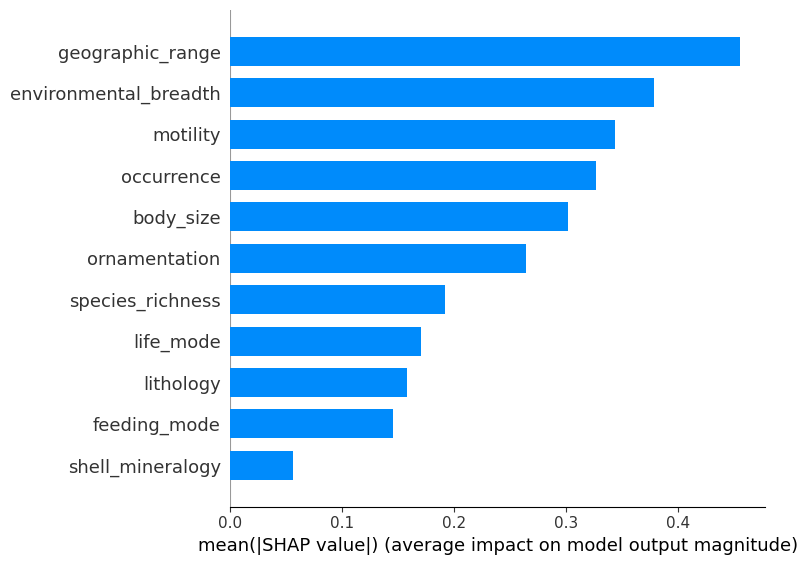

Learning rate set to 0.006676
0:	learn: 0.6909972	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6891616	total: 2.56ms	remaining: 1.27s
2:	learn: 0.6876756	total: 3.41ms	remaining: 1.13s
3:	learn: 0.6852554	total: 4.25ms	remaining: 1.06s
4:	learn: 0.6837340	total: 5.24ms	remaining: 1.04s
5:	learn: 0.6818518	total: 6.25ms	remaining: 1.03s
6:	learn: 0.6798980	total: 7.27ms	remaining: 1.03s
7:	learn: 0.6782283	total: 8.35ms	remaining: 1.03s
8:	learn: 0.6763414	total: 9.33ms	remaining: 1.03s
9:	learn: 0.6744678	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6729395	total: 11.8ms	remaining: 1.06s
11:	learn: 0.6717809	total: 13.1ms	remaining: 1.08s
12:	learn: 0.6692011	total: 14.3ms	remaining: 1.08s
13:	learn: 0.6668109	total: 15.3ms	remaining: 1.08s
14:	learn: 0.6652297	total: 16.2ms	remaining: 1.06s
15:	learn: 0.6630200	total: 17.4ms	remaining: 1.07s
16:	learn: 0.6612475	total: 18.5ms	remaining: 1.07s
17:	learn: 0.6600325	total: 19.7ms	remaining: 1.07s
18:	learn: 0.6589751	total: 20.3ms	remaining

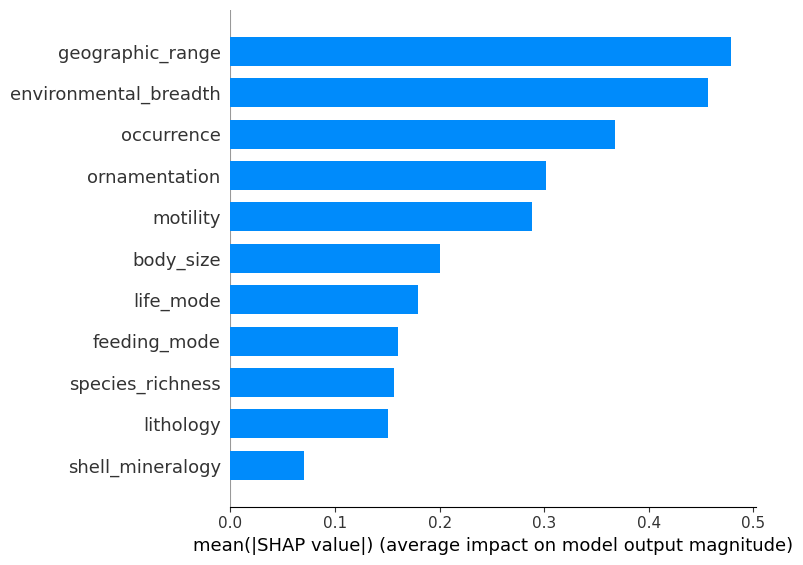

Learning rate set to 0.006676
0:	learn: 0.6911516	total: 1.78ms	remaining: 1.78s
1:	learn: 0.6900895	total: 2.63ms	remaining: 1.31s
2:	learn: 0.6887146	total: 3.57ms	remaining: 1.19s
3:	learn: 0.6868788	total: 4.41ms	remaining: 1.1s
4:	learn: 0.6850877	total: 5.28ms	remaining: 1.05s
5:	learn: 0.6826321	total: 6.22ms	remaining: 1.03s
6:	learn: 0.6808695	total: 7.05ms	remaining: 1000ms
7:	learn: 0.6792009	total: 7.82ms	remaining: 969ms
8:	learn: 0.6777399	total: 8.77ms	remaining: 966ms
9:	learn: 0.6753464	total: 9.91ms	remaining: 981ms
10:	learn: 0.6736248	total: 10.7ms	remaining: 965ms
11:	learn: 0.6720786	total: 11.6ms	remaining: 953ms
12:	learn: 0.6706863	total: 12.4ms	remaining: 944ms
13:	learn: 0.6693855	total: 13.7ms	remaining: 965ms
14:	learn: 0.6680924	total: 14.9ms	remaining: 982ms
15:	learn: 0.6667184	total: 15.9ms	remaining: 978ms
16:	learn: 0.6648464	total: 16.9ms	remaining: 976ms
17:	learn: 0.6632296	total: 18ms	remaining: 983ms
18:	learn: 0.6618189	total: 19ms	remaining: 97

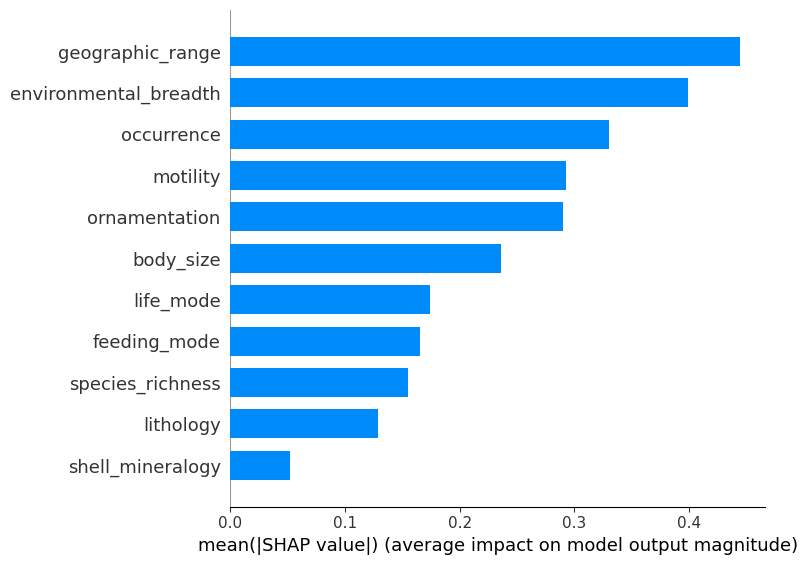

Learning rate set to 0.006676
0:	learn: 0.6915368	total: 2.17ms	remaining: 2.16s
1:	learn: 0.6899992	total: 3.43ms	remaining: 1.71s
2:	learn: 0.6881719	total: 4.65ms	remaining: 1.54s
3:	learn: 0.6864614	total: 6.13ms	remaining: 1.53s
4:	learn: 0.6851355	total: 7.54ms	remaining: 1.5s
5:	learn: 0.6836361	total: 9.5ms	remaining: 1.57s
6:	learn: 0.6816196	total: 11.1ms	remaining: 1.58s
7:	learn: 0.6796465	total: 12.5ms	remaining: 1.55s
8:	learn: 0.6781383	total: 14.4ms	remaining: 1.58s
9:	learn: 0.6761864	total: 16ms	remaining: 1.59s
10:	learn: 0.6743553	total: 17.5ms	remaining: 1.57s
11:	learn: 0.6726752	total: 18.9ms	remaining: 1.55s
12:	learn: 0.6709175	total: 20.1ms	remaining: 1.53s
13:	learn: 0.6695407	total: 21.6ms	remaining: 1.52s
14:	learn: 0.6683799	total: 23.1ms	remaining: 1.51s
15:	learn: 0.6667399	total: 24.5ms	remaining: 1.51s
16:	learn: 0.6653961	total: 26.2ms	remaining: 1.52s
17:	learn: 0.6644024	total: 27.5ms	remaining: 1.5s
18:	learn: 0.6627832	total: 28.9ms	remaining: 1.4

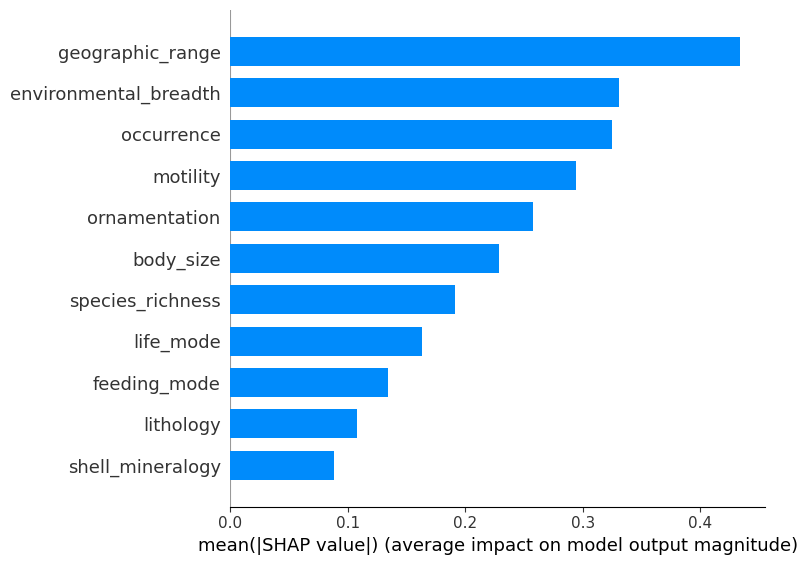

Learning rate set to 0.006676
0:	learn: 0.6912302	total: 1.75ms	remaining: 1.75s
1:	learn: 0.6892980	total: 2.5ms	remaining: 1.25s
2:	learn: 0.6875707	total: 3.28ms	remaining: 1.09s
3:	learn: 0.6855915	total: 4.02ms	remaining: 1s
4:	learn: 0.6831743	total: 4.76ms	remaining: 948ms
5:	learn: 0.6817073	total: 5.52ms	remaining: 914ms
6:	learn: 0.6803490	total: 6.3ms	remaining: 895ms
7:	learn: 0.6785032	total: 7.78ms	remaining: 965ms
8:	learn: 0.6766269	total: 8.54ms	remaining: 940ms
9:	learn: 0.6747967	total: 9.56ms	remaining: 946ms
10:	learn: 0.6737883	total: 10.5ms	remaining: 946ms
11:	learn: 0.6718662	total: 11.5ms	remaining: 947ms
12:	learn: 0.6698363	total: 12.3ms	remaining: 936ms
13:	learn: 0.6677778	total: 14ms	remaining: 986ms
14:	learn: 0.6664104	total: 15.1ms	remaining: 989ms
15:	learn: 0.6650949	total: 16.5ms	remaining: 1.01s
16:	learn: 0.6632333	total: 17.4ms	remaining: 1.01s
17:	learn: 0.6617154	total: 18.4ms	remaining: 1s
18:	learn: 0.6609360	total: 19ms	remaining: 983ms
19:	

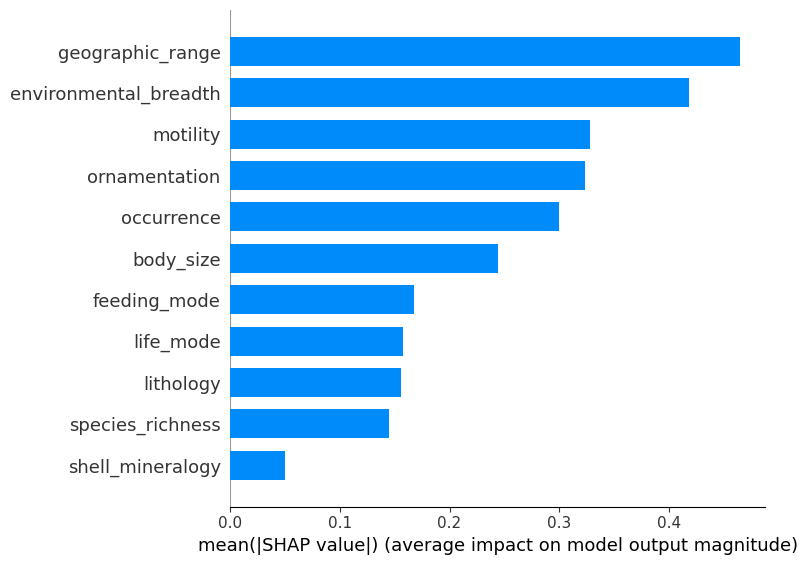

In [33]:
i = 1
for train,test in cv.split(X,y):
    prediction = clf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X.iloc[train])
    features = df.drop(['survival_status'], axis=1).columns.tolist()
    shap_type = grouped_shap(shap_values, features, group_categorical)
    shap.summary_plot(shap_type.values, features=shap_type.columns, plot_type = "bar")
    i= i+1